In [31]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import lstsq
from scipy import integrate

In [15]:
def coord2index(i, j):
    return i*n + j
def shortdis(x,y,x1,y1):
    E = csr_matrix((n**2, n**2))
    for i in range(n):
        for j in range(n):
            if A_store[i,j]!=1:
                # testing the left direction
                if j > 0: # if not on the left edge
                    if A_store[i,j-1] != 1: # if there is no object to the left
                        E[coord2index(i,j), coord2index(i,j-1)] = 1 # the edge from (i,j) to (i,j-1)
                if j <(n-1):# if not on right edge
                    if A_store[i,j+1]!=1:
                        E[coord2index(i,j),coord2index(i,j+1)]=1
                if i>0:# if not on upper edge
                    if A_store[i-1,j]!=1:
                        E[coord2index(i,j),coord2index(i-1,j)]=1
                if i<(n-1):#if not on lower edge
                    if A_store[i+1,j]!=1:
                        E[coord2index(i,j),coord2index(i+1,j)]=1
                if j<(n-1) and i<(n-1):#If not on right or lower
                    if A_store[i+1,j+1]!=1:
                        E[coord2index(i,j),coord2index(i+1,j+1)]=2**0.5
                if j>0 and i<(n-1):#If not left lower
                    if A_store[i+1,j-1]!=1:
                        E[coord2index(i,j),coord2index(i+1,j-1)]=2**0.5
                if i>0 and j > 0:#Not upper left
                    if A_store[i-1,j-1]!=1:
                        E[coord2index(i,j),coord2index(i-1,j-1)]=2**0.5
                if i>0 and j<(n-1):#Not upper right
                    if A_store[i-1,j+1]!=1:
                        E[coord2index(i,j),coord2index(i-1,j+1)]=2**0.5

            # TODO: do this for the rest of the directions. Make sure to weigh the diagonal entries
            # accordingly!


    # Finally, put our constructed E matrix into the shortest path finder

    # first, get the index for the starting point
    start_index = coord2index(y,x)
    # feed this into scipy to find the 
    dist_matrix, predecessors = shortest_path(csgraph=E, directed=False, indices=start_index, return_predecessors=True)
    # get the distance from the start point to (i_end, j_end)
    return (dist_matrix[coord2index(y1,x1)])


[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1.]]


/Users/shizhuye/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


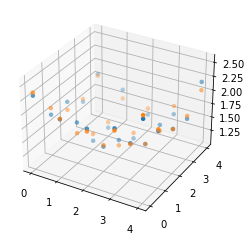

0.0066406992744140894
[ 2.37230539 -0.44523404 -0.63297595  0.0059609   0.12146187  0.12042574]


In [18]:
n = 5
A_store = np.zeros((n,n))
A_store[1,1] = 1
A_store[2,2] = 1
A_store[4,1] = 1
A_store[3,3] = 1
A_store[4,4] = 1
A_store[2,0] = 1
print(A_store)


x_cor=[]
y_cor=[]
avgdist=[]
for i in range(n):
    for j in range(n):
        x_cor.append(j)
        y_cor.append(i)
x_cord=[]
y_cord=[]
for i in range(n):
    for j in range(n):
        if A_store[i,j]==1:
            x_cord.append(j)
            y_cord.append(i)
for i in range(len(x_cor)):
    avgdis=0
    for j in range(len(x_cord)):
        A_store[y_cord[j],x_cord[j]]=0
        if A_store[y_cor[i],x_cor[i]]==1:
            A_store[y_cor[i],x_cor[i]]=0
            avgdis+=shortdis(x_cor[i],y_cor[i],x_cord[j],y_cord[j])
            A_store[y_cor[i],x_cor[i]]=1
        else:
            avgdis+=shortdis(x_cor[i],y_cor[i],x_cord[j],y_cord[j])
        A_store[y_cord[j],x_cord[j]]=1
    if A_store[y_cor[i],x_cor[i]]==1:
        avgdist.append(avgdis/((len(x_cord)-1)))
    else:
        avgdist.append(avgdis/(len(x_cord)))
for i in range(len(avgdist)):
    avgdist[i]=(0.08118*avgdist[i]+3.69)**2-13.6161
#Arrays
       
x=np.array(x_cor)
y=np.array(y_cor)
z=np.array(avgdist)
o=[]
for i in range(len(x)):
    o.append(1)
one=np.array(o)
#Regression



def quadratic_reg(x,y,z):
    M = x[:, np.newaxis]*[0,1,0,0,0,0]+one[:, np.newaxis]*[1,0,0,0,0,0]+y[:, np.newaxis]*[0,0,1,0,0,0]
    M=M+x[:, np.newaxis]*[0,0,0,1,0,0]*y[:, np.newaxis]*[0,0,0,1,0,0]+x[:, np.newaxis]*[0,0,0,0,1,0]*x[:, np.newaxis]*[0,0,0,0,1,0]
    M=M+y[:, np.newaxis]*[0,0,0,0,0,1]*y[:, np.newaxis]*[0,0,0,0,0,1]
    p, res, rnk, s = lstsq(M, z)
    return p
j=quadratic_reg(x,y,z)
def function_quad(x,y):
    z_cord=[]
    for i in range(len(x)):
        z_cord.append(j[0]+j[1]*x[i]+j[2]*y[i]+j[3]*x[i]*y[i]+j[4]*x[i]*x[i]+j[5]*y[i]*y[i])
    return z_cord

#Plot

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_cor,y_cor,avgdist,cmap='viridis', edgecolor='none')
ax.scatter(x_cor,y_cor,function_quad(x_cor,y_cor),cmap='viridis', edgecolor='none')
plt.show()
#for i in range(25):
 #   print("(",x_cor[i],",",y_cor[i],",",avgdist[i],")")
dev=0
for i in range(25):
    dev+=abs(avgdist[i]-function_quad(x_cor,y_cor)[i])
print((dev/25)**2)
print(quadratic_reg(x,y,z))
    

In [29]:
B_store=np.zeros((n,n))
def popularity(Fame, Price,C):
    return (((1-Price)*(1-Fame))**(1+C-Fame))+Fame
pop=[]
for i in range(len(x_cord)):
    print("a")
quadratic_reg(x,y,z)

a
a
a
a
a
a
0


In [44]:
f = lambda y, x: kk[0]+kk[1]*x+kk[2]*y+kk[3]*x*y+kk[4]*x*x+kk[5]*y*y
integrate.dblquad(f, 0, n-1, 0, n-1)[0]

24.476740619479898

In [43]:
print(x)
print(y)

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]
